In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

In [34]:
df=pd.read_csv('mcdonalds.csv')

In [35]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [36]:
df.shape

(1453, 15)

In [37]:
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [38]:
attributes = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender']

In [39]:
le=LabelEncoder()
for i in attributes:
    df[i]=le.fit_transform(df[i])

In [40]:
data = df.iloc[:, :11]
data.describe().T['mean']

yummy         0.552650
convenient    0.907777
spicy         0.093599
fattening     0.867171
greasy        0.526497
fast          0.900206
cheap         0.598761
tasty         0.644184
expensive     0.357880
healthy       0.198899
disgusting    0.242946
Name: mean, dtype: float64

In [41]:
pca=PCA()
data=pca.fit_transform(data)
Variance_ratio = pca.explained_variance_ratio_

In [42]:
Variance_ratio

array([0.29944723, 0.19279721, 0.13304535, 0.08309578, 0.05948052,
       0.05029956, 0.0438491 , 0.03954779, 0.0367609 , 0.03235329,
       0.02932326])

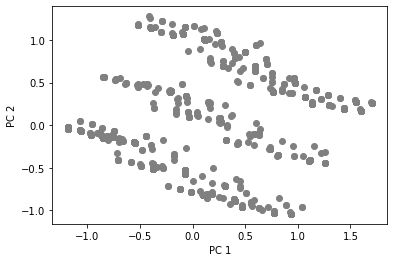

In [43]:
import matplotlib.pyplot as plt
plt.scatter(data[:, 0], data[:, 1], c='grey')
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()

In [44]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42).fit(data)
kmeans.cluster_centers_

array([[ 1.21671724,  0.21205951,  0.1806137 ,  0.09686205, -0.06110683,
        -0.03789275, -0.03223904, -0.00522339,  0.00538152,  0.02144462,
        -0.00703991],
       [-0.32636933, -0.17552184, -0.63158923,  0.06486282,  0.06142121,
         0.063229  ,  0.04725888, -0.00846463, -0.0464996 , -0.00422126,
         0.00390712],
       [ 0.06075632,  0.98506171, -0.05932374, -0.08707779,  0.04908807,
        -0.02758364,  0.00625903, -0.00981488, -0.0149853 ,  0.0314545 ,
        -0.03581298],
       [ 0.46166893, -0.81308776,  0.21513182, -0.0518743 ,  0.12680241,
         0.00175155, -0.06163148,  0.00604181,  0.09260564, -0.03227396,
         0.00519834],
       [-0.8156656 , -0.08559399,  0.28570356, -0.01647264, -0.13016327,
        -0.01053723,  0.01928031,  0.01216057, -0.01912225, -0.00827178,
         0.02111901]])

In [45]:
from sklearn.cluster import KMeans

k_range = range(2, 8)
within_cluster_distances = []

In [46]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(data)
    within_cluster_distances.append(kmeans.inertia_)

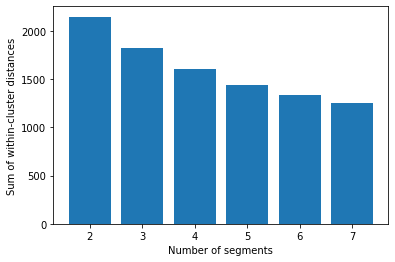

In [47]:
plt.bar(k_range, within_cluster_distances)
plt.xlabel('Number of segments')
plt.ylabel('Sum of within-cluster distances')
plt.show()